# TM351 Data management and analysis 

# Spring  2021 TMA & Project Notebook Template

## _Please complete the information below :_

> ### Branch :     Amman 
> ### Student Name :   Nancy AlAswad 
> ### Student ID  :    2180385
### Group number  :
### Instructor :

    

# Question 1 (30 marks)

<div class="alert alert-block alert-warning">
_Please complete and submit all the requested Jupyter notebooks in a "solved form as a separate .rar  or .zip file._


> ##   I did submit all the requested Jupyter notebooks in a "solved form as a separate .zip file.

# Question 2 (10 marks)

<div class="alert alert-block alert-warning">
_Please complete all notebook work that is needed to support you 300-word summary here in the form of a sequence of markdown and well commented SOLVED code cells.  Then, insert the summary itself in your solution document._


> ##  Here we import required libraries 

In [319]:
## import required libraries
import pandas as pd
import numpy as np
import matplotlib as plt
import json
import seaborn as sns
import pandas as pd
from pandas import DataFrame
from pandasql import sqldf
pysqldf = lambda q: sqldf(q, globals())

### We use read function to read a csv file to Import Pima Indians Diabetes Dataset and prepare our analysis

In [320]:
Analysis_Framework = pd.read_csv('diabetes.csv' )
dataset_diabetes = pd.DataFrame(Analysis_Framework)


### I will explore first 15 row in the file to see the data type  in it 

In [321]:
dataset_diabetes.head(15)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


> ##  Here we show the number of colums and records

### The purpose is :  I will check the number of rows (observations) and the number of columns (attributes) so I can describe our dataset in proper way in my report in the second question 

In [322]:
print("Our dataset contains: {} rows as observations number and {} columns as attributes number".format(diabetes.shape[0],diabetes.shape[1]))
dataset_diabetes.head(10)

Our dataset contains: 768 rows as observations number and 9 columns as attributes number


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


> ##  Here we try to know the type for  each feature

In [323]:
dataset_diabetes.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

> ##  Here we make our assessment of data set  Quality 

### The purpose is :  I will check the missing data, so I can describe our dataset in proper way in my report in the second question 



## First step : Replacing the zero values with NaN so we can evaluating the null values to the  attributes obtained


In [324]:

## ........ I create the funcyion (Nancy which is my name 😄 ) to help me replace zero values with NAN........

Nancy = dataset_diabetes.copy(deep = True)
Nancy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = Nancy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

## showing the count of Nans
print(Nancy.isnull().sum())

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


## ----------------------------------------------------------------------------------------------------------------------

# Question 3 - Project (45 marks)

<div class="alert alert-block alert-warning">
_Please complete all notebook work that is needed to support your conclusions for this project question in a series of markdown and well-commented SOLVED code cells below.  Supply the project report itself in the in the solution document._


> ##  Data Acquisition

In [325]:
## import required libraries for the third question
## We used SQL language with panda’s data frame to visualize the statistical measures 
## and matplotlib to show different diagrams for each question.

import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
import json
import pandas as pd
from pandas import DataFrame
from pandasql import sqldf
pysqldf = lambda q: sqldf(q, globals())
import matplotlib.pyplot as plt
import plotly.express as px
import plotly
plotly.offline.init_notebook_mode(connected = True)
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split as tts,RandomizedSearchCV,cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report,plot_confusion_matrix
from random import randint

### 1-	Investigate the relation between Pregnancies and diabetes with display average Pregnancies for patients.

In [328]:
query = '''SELECT avg(Pregnancies) As "average Pregnancies" , "Outcome"  
FROM dataset_diabetes 
Group By "Outcome"   
;'''
q1 = pysqldf(query)
q1

,average Pregnancies,Outcome
0,3.298000,0
1,4.865672,1


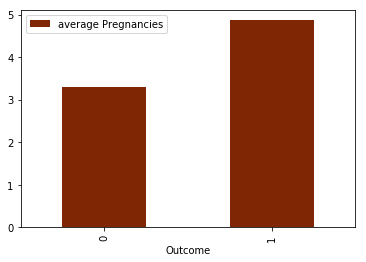

In [329]:
q1.plot.bar(x='Outcome', y='average Pregnancies' , colormap='Oranges_r')

plt.show()

C:\Users\USER\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



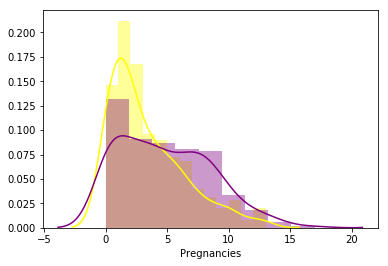

In [302]:
sns.distplot(Nancy[Nancy['Outcome'] == 0]["Pregnancies"], color=  'yellow') #  for the Healthy chart
sns.distplot(Nancy[Nancy['Outcome'] == 1]["Pregnancies"], color= 'purple') # for the Diabetic chart

### 2-	Investigate the relation between BMI and diabetes and average BMI for patients

In [303]:
query = '''SELECT avg(BMI) As "average BMI" , "Outcome"  
FROM dataset_diabetes 
Group By "Outcome"   
;'''
q2 = pysqldf(query)
q2

,average BMI,Outcome
0,30.304200,0
1,35.142537,1


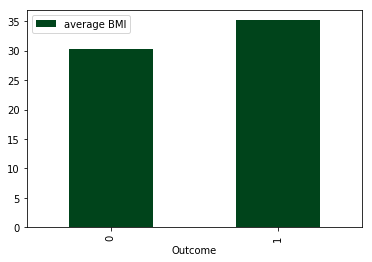

In [304]:
q2.plot.bar(x='Outcome', y='average BMI' , colormap='BuGn_r')

plt.show()

C:\Users\USER\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



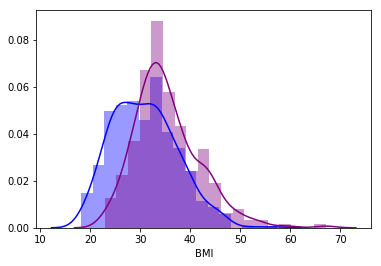

In [305]:
sns.distplot(Nancy[Nancy['Outcome'] == 0]["BMI"], color='blue') #  for the Healthy chart
sns.distplot(Nancy[Nancy['Outcome'] == 1]["BMI"], color='purple') # for the Diabetic chart

### 3-	Investigate the relation between  Glucose and diabetes and average Glucose level for patients.

In [306]:
query = '''SELECT avg(Glucose) As "average Glucose" , "Outcome"  
FROM dataset_diabetes 
Group By "Outcome"   
;'''
q3 = pysqldf(query)
q3

,average Glucose,Outcome
0,109.980000,0
1,141.257463,1


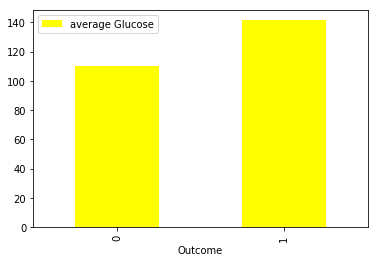

In [307]:
q3.plot.bar(x='Outcome', y='average Glucose' , colormap='gnuplot_r')  

plt.show()

In [308]:
Nancy['Glucose'].fillna(Nancy['Glucose'].median(), inplace = True)
Nancy['BloodPressure'].fillna(Nancy['BloodPressure'].median(), inplace = True)
Nancy['SkinThickness'].fillna(Nancy['SkinThickness'].median(), inplace = True)
Nancy['Insulin'].fillna(Nancy['Insulin'].median(), inplace = True)
Nancy['BMI'].fillna(Nancy['BMI'].median(), inplace = True)

C:\Users\USER\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



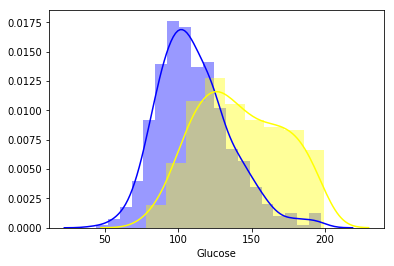

In [309]:
sns.distplot(Nancy[Nancy['Outcome'] == 0]["Glucose"],color='blue' )#  for the Healthy chart
sns.distplot(Nancy[Nancy['Outcome'] == 1]["Glucose"], color='yellow') # for the Diabetic chart

### 4-	Investigate the relation between Insulin and diabetes and average Insulin for patients.

In [310]:
query = '''SELECT avg(Insulin) As "average Insulin" , "Outcome"  
FROM dataset_diabetes 
Group By "Outcome"   
;'''
q4 = pysqldf(query)
q4

,average Insulin,Outcome
0,68.792000,0
1,100.335821,1


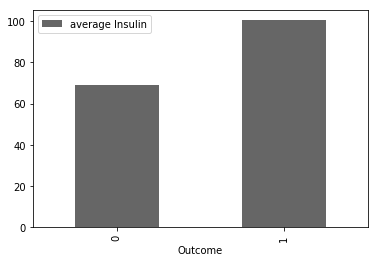

In [311]:
q4.plot.bar(x='Outcome', y='average Insulin' , colormap='Accent_r')

plt.show()

C:\Users\USER\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



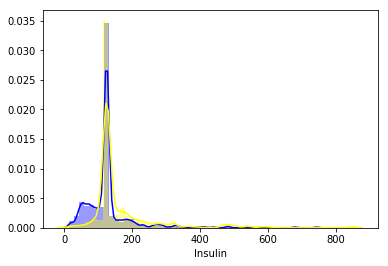

In [312]:
sns.distplot(Nancy[Nancy['Outcome'] == 0]["Insulin"], color='blue') #  for the Healthy chart
sns.distplot(Nancy[Nancy['Outcome'] == 1]["Insulin"], color='yellow')  # for the Diabetic chart

### 5-	Investigate the relation between Blood pressure and diabetes and average Blood pressure for patients.

In [313]:
query = '''SELECT avg(BloodPressure) As "average Blood Pressure" , "Outcome"  
FROM dataset_diabetes 
Group By "Outcome"   
;'''
q5 = pysqldf(query)
q5

,average Blood Pressure,Outcome
0,68.184000,0
1,70.824627,1


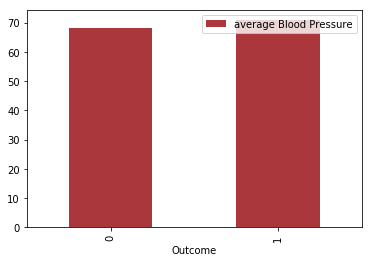

In [314]:
q5.plot.bar(x='Outcome', y='average Blood Pressure' , colormap='vlag_r')

plt.show()

C:\Users\USER\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



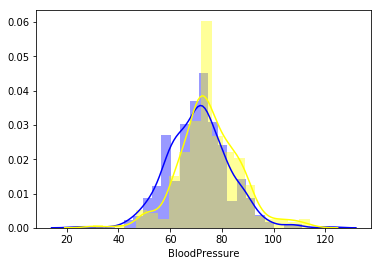

In [315]:
sns.distplot(Nancy[Nancy['Outcome'] == 0]["BloodPressure"], color='blue')#  for the Healthy chart
sns.distplot(Nancy[Nancy['Outcome'] == 1]["BloodPressure"], color='yellow') # for the Diabetic chart

# Question 4 - Project (15 marks)

### I use the  below code as example of using numpy to generate some random data, and using matplotlib to visualise it.

C:\Users\USER\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



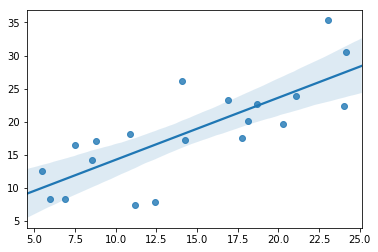

In [336]:
## The site : https://colab.research.google.com/notebooks/charts.ipynb#scrollTo=el13bTbyPRw4

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Generate some random data
num_points = 20
# x will be 5, 6, 7... but also twiddled randomly
x = 5 + np.arange(num_points) + np.random.randn(num_points)
# y will be 10, 11, 12... but twiddled even more randomly
y = 10 + np.arange(num_points) + 5 * np.random.randn(num_points)
sns.regplot(x, y)
plt.show()